In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('tips.csv')
df.replace({'TRUE':1,'FALSE':0},inplace=True)
df.replace({'Win':1,'Lose':0},inplace=True)
# df.replace({'Tipster A':1,'Tipster B':0,'Tipster C':2,'Tipster D':3,'Tipster E':4,'Tipster F':5,'Tipster G':6,'Tipster H':7,'Tipster I':8},inplace=True)
df.replace({'Tipster A':0, 'Tipster B':1, 'Tipster C':2, 'Tipster D':3, 'Tipster E':4, 'Tipster F':5,
 'Tipster G':6, 'Tipster H':7, 'Tipster I':8, 'Tipster J':9, 'Tipster K':10, 'Tipster L':11,
 'Tipster M':12, 'Tipster N':13, 'Tipster O':14, 'Tipster P':15, 'Tipster Q':16, 'Tipster R':17,
 'Tipster S':18, 'Tipster T':19, 'Tipster U':20, 'Tipster V':21, 'Tipster W':22, 'Tipster X':23,
 'Tipster Y':24, 'Tipster Z':25, 'Tipster A1':26, 'Tipster B1':27, 'Tipster C1':28,
 'Tipster D1':29, 'Tipster E1':30},inplace=True)
df.Tipster=df.Tipster.astype(float)






C:\Users\WIN11\AppData\Local\Temp\ipykernel_7180\1189117564.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Win':1,'Lose':0},inplace=True)
C:\Users\WIN11\AppData\Local\Temp\ipykernel_7180\1189117564.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Tipster A':0, 'Tipster B':1, 'Tipster C':2, 'Tipster D':3, 'Tipster E':4, 'Tipster F':5,


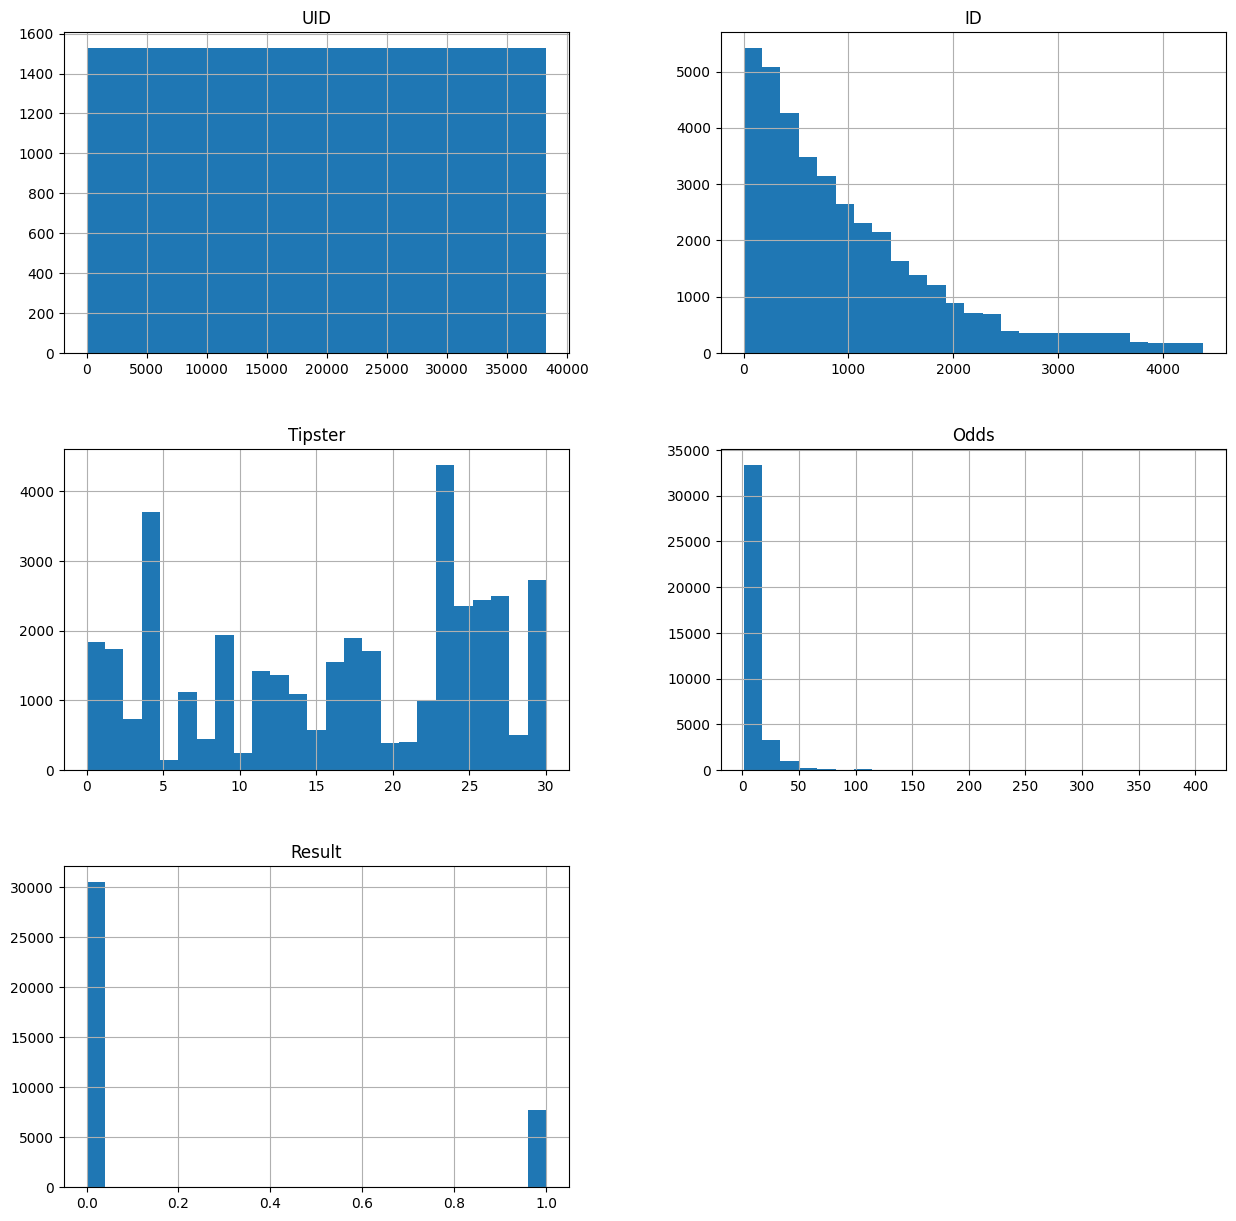

In [30]:
df.hist(bins=25,figsize=(15,15))
plt.show()

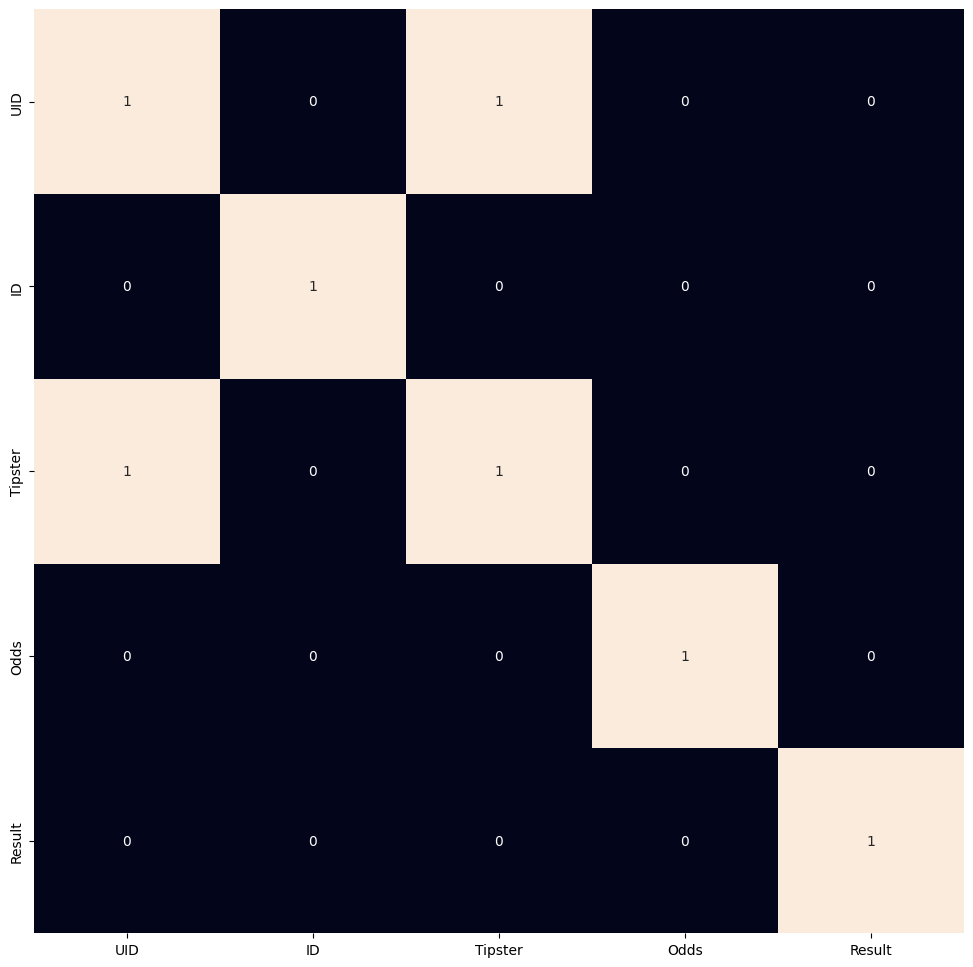

In [31]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix > 0.7, annot=True, cbar=False)
plt.show()

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,38248.0,19124.500000,11041.390885,1.00,9562.75,19124.5,28686.25,38248.0
ID,38248.0,1013.308251,917.941098,1.00,318.00,749.0,1419.00,4383.0
Tipster,38248.0,16.202520,9.291154,0.00,8.00,17.0,24.00,30.0
Odds,38248.0,10.994968,11.004589,1.07,5.00,8.0,13.00,407.0
Result,38248.0,0.200873,0.400659,0.00,0.00,0.0,0.00,1.0


In [33]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the data
df['Track'] = le.fit_transform(df['Track'])
df['Horse'] = le.fit_transform(df['Horse'])

In [34]:
X=df.drop(['UID','Date','Bet Type','Result'],axis=1)
Y=df.Result
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((30598, 6), (7650, 6))

In [35]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [36]:

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.6000420890513556
Validation Accuracy :  0.5217984439644091

SVC() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5

